In [8]:
import pandas as pd

In [2]:
df = pd.read_csv("Resultados_semOutliers_ML_Barra.csv")

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Url,Preço,Titulo Imóvel,Endereço,Área,Número de Quartos
0,0,0.0,https://apartamento.mercadolivre.com.br/MLB-21...,1900000.0,Apartamento À Venda Em Rio De Janeiro - 46395,"Rua Henrique De Moura Costa, Barra Da Tijuca, ...",169.0,3.0
1,1,1.0,https://apartamento.mercadolivre.com.br/MLB-20...,1922800.0,Cobertura Península Green Garden - Barra Da Ti...,"Avenida Das Acácias Da Península, Barra Da Tij...",203.0,3.0
2,2,2.0,https://apartamento.mercadolivre.com.br/MLB-19...,4130000.0,"Apartamento Com 3 Dormitórios À Venda, 170 M² ...","Avenida Lúcio Costa, Barra Da Tijuca, Rio De J...",170.0,3.0
3,3,3.0,https://apartamento.mercadolivre.com.br/MLB-20...,1350000.0,"Apartamento Com 2 Dormitórios, 75 M² - Venda P...","Barra Da Tijuca, Rio De Janeiro Zona Oeste, Ri...",75.0,2.0
4,4,4.0,https://apartamento.mercadolivre.com.br/MLB-21...,3400000.0,"Apartamento Duplex Com 3 Dormitórios À Venda, ...","Avenida Lúcio Costa, Barra Da Tijuca, Rio De J...",304.0,3.0


In [130]:
import numpy as np
import scikitplot as skplt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
from scikitplot.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#from catboost import CatBoostRegressor

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1882 non-null   int64  
 1   Unnamed: 0.1       1718 non-null   float64
 2   Url                1718 non-null   object 
 3   Preço              1718 non-null   float64
 4   Titulo Imóvel      1718 non-null   object 
 5   Endereço           1718 non-null   object 
 6   Área               1718 non-null   float64
 7   Número de Quartos  1717 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 117.8+ KB


In [6]:
del df["Unnamed: 0.1"]
del df["Unnamed: 0"]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Url                1718 non-null   object 
 1   Preço              1718 non-null   float64
 2   Titulo Imóvel      1718 non-null   object 
 3   Endereço           1718 non-null   object 
 4   Área               1718 non-null   float64
 5   Número de Quartos  1717 non-null   float64
dtypes: float64(3), object(3)
memory usage: 88.3+ KB


In [9]:
df.isnull().sum()[:15]

Url                  164
Preço                164
Titulo Imóvel        164
Endereço             164
Área                 164
Número de Quartos    165
dtype: int64

In [36]:
df = df.dropna(subset=["Url"]).reset_index(drop=True)

In [38]:
df.isnull().sum()

Url                  0
Preço                0
Titulo Imóvel        0
Endereço             0
Área                 0
Número de Quartos    0
dtype: int64

In [39]:
df = df.dropna(subset=["Número de Quartos"]).reset_index(drop=True)
df.isnull().sum()

Url                  0
Preço                0
Titulo Imóvel        0
Endereço             0
Área                 0
Número de Quartos    0
dtype: int64

In [22]:
df[df.duplicated(subset=["Url", "Preço", "Titulo Imóvel", "Endereço", "Área", "Número de Quartos"])]

,Url,Preço,Titulo Imóvel,Endereço,Área,Número de Quartos


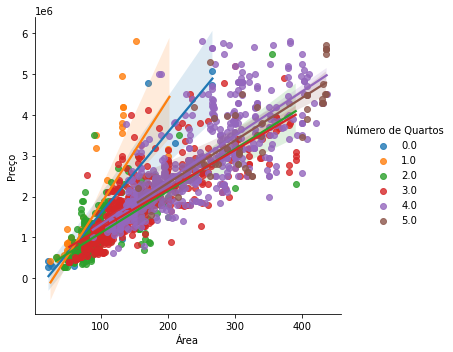

In [40]:
sns.lmplot(data=df, x="Área", y="Preço", hue="Número de Quartos")

In [20]:
df[df.columns[1:6]].corr()

,Preço,Área,Número de Quartos
Preço,1.000000,0.867003,0.597866
Área,0.867003,1.000000,0.686915
Número de Quartos,0.597866,0.686915,1.000000


In [41]:
from sklearn.linear_model import LinearRegression, SGDRegressor, PassiveAggressiveRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [26]:
features = ["Área", "Número de Quartos"]
target = ["Preço"]
model_input = df[features + target]

In [27]:
X = model_input[features]
y = model_input[target].values.reshape(-1,)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=7775)

In [85]:
model = LinearRegression(fit_intercept=True, normalize =False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [95]:
def mape(y_real, y_predicted): #Media do erro em porcentagem
    return np.mean(np.abs(y_real - y_predicted)/y_real)

In [96]:
mape(y_test,y_pred)

0.23970613817697517

In [97]:
y_pred_train = model.predict(X_train)
mape(y_pred_train,y_train)

0.2196992021501784

In [74]:
model.intercept_

76491.82678454882

In [126]:
e = y_pred - y_test

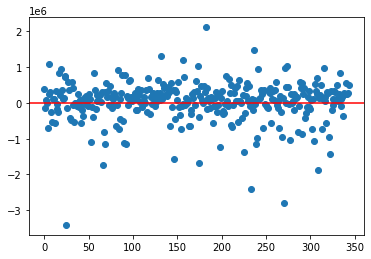

In [76]:
plt.scatter(x=range(len(e)), y=e)
plt.axhline(y=0, c="r")

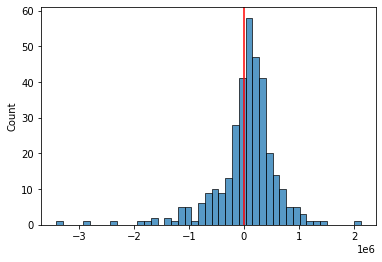

In [77]:
sns.histplot(x=e)
plt.axvline(x=0, c="r")

In [104]:
grid_de_param={"fit_intercept":[True,False], "normalize":[True,False]}
model = LinearRegression()

In [111]:
gs = GridSearchCV(model, param_grid=grid_de_param, cv=3, scoring = make_scorer(mape))

In [112]:
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring=make_scorer(mape))

In [113]:
gs.best_params_

{'fit_intercept': True, 'normalize': False}

In [114]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003665,0.000470,0.002331,4.706403e-04,True,True,"{'fit_intercept': True, 'normalize': True}",0.227081,0.243228,0.248678,0.239662,0.009171,2
1,0.002331,0.000471,0.001000,1.946680e-07,True,False,"{'fit_intercept': True, 'normalize': False}",0.227081,0.243228,0.248678,0.239662,0.009171,1
2,0.002998,0.000815,0.002665,4.717638e-04,False,True,"{'fit_intercept': False, 'normalize': True}",0.219935,0.242841,0.237574,0.233450,0.009796,3
3,0.005331,0.000943,0.002665,4.707523e-04,False,False,"{'fit_intercept': False, 'normalize': False}",0.219935,0.242841,0.237574,0.233450,0.009796,3


In [54]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [58]:
model2 = KNeighborsRegressor(n_neighbors=5)

In [59]:
model2.fit(scaled_X_train, y_train)

KNeighborsRegressor()

In [69]:
y_pred2 = model2.predict(scaled_X_test)

In [70]:
y_pred_train2 = model2.predict(scaled_X_train)

In [92]:
mape(y_train, y_pred_train2)

0.18197848305572986

In [93]:
mape(y_test, y_pred2)

0.2175539554631258

In [88]:
residuals = y_test - y_pred2

In [89]:
np.mean(residuals)

-175.07965116279178

In [117]:
np.mean(y_test)

1899422.933139535

In [118]:
175.07965116279178/1899422.933139535

9.217518021297373e-05

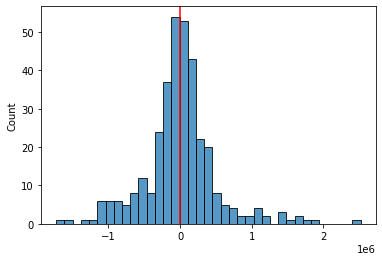

In [68]:
sns.histplot(x=residuals)
plt.axvline(x=0, c="r")

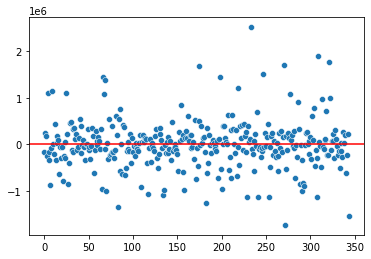

In [120]:
sns.scatterplot(y=residuals, x=range(len(residuals)))
plt.axhline(y=0, c= "r")

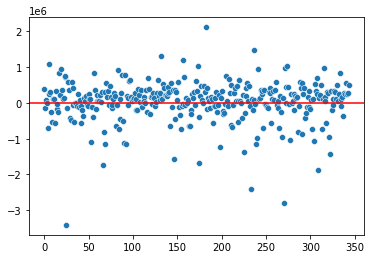

In [128]:
sns.scatterplot(y=e, x=range(len(e)))
plt.axhline(y=0, c= "r")